In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)

In [2]:
from astropy.utils.data import download_file


In [3]:
from astropy.io import fits


In [4]:
image_file2 = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
image_file = "nuclei_56_example"
image_file3= "nuclei_56_ex2"
image_file4= "nuclei_full_56_example"
image_file5= "nuclei_full_56_ex2"

In [5]:
hdu_list = fits.open(image_file)
hdu_list.info()
hdu_list2 = fits.open(image_file2)
hdu_list2.info()
hdu_list3 = fits.open(image_file3)
hdu_list3.info()
hdu_list4 = fits.open(image_file4)
hdu_list4.info()
hdu_list5 = fits.open(image_file5)
hdu_list5.info()

Filename: nuclei_56_example
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     489   (24, 1, 24, 94)   float32   
Filename: C:\Users\kreativekeith422\.astropy\cache\download\py3\2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
Filename: nuclei_56_ex2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     489   (24, 1, 24, 94)   float32   
Filename: nuclei_full_56_example
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     488   (24, 41, 24, 94)   float32   
Filename: nuclei_full_56_ex2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 41, 24, 94)   float32   


In [7]:
hdr=hdu_list5[0].header
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    5 / number of data axes                            
NAXIS1  =                   32 / length of data axis 1                          
NAXIS2  =                   29 / length of data axis 2                          
NAXIS3  =                   41 / length of data axis 3                          
NAXIS4  =                   24 / length of data axis 4                          
NAXIS5  =                   94 / length of data axis 5                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =                 -14. / Start of axis 1                                
CRVAL2  =                 -1

In [8]:
len(list(hdr.keys()))

491

In [9]:
image_data = hdu_list[0].data

In [10]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(94, 24, 1, 24)


In [11]:
hdu_list.close()

In [12]:
image_data = fits.getdata(image_file)
image_data2 = fits.getdata(image_file2)
image_data3 = fits.getdata(image_file3)
image_data4 = fits.getdata(image_file4)
image_data5 = fits.getdata(image_file5)
print(type(image_data))
print(image_data.shape)
print(type(image_data2))
print(image_data2.shape)
print(type(image_data3))
print(image_data3.shape)
print(type(image_data4))
print(image_data4.shape)

<class 'numpy.ndarray'>
(94, 24, 1, 24)
<class 'numpy.ndarray'>
(893, 891)
<class 'numpy.ndarray'>
(94, 24, 1, 24)
<class 'numpy.ndarray'>
(94, 24, 41, 24)


In [13]:
len(image_data4[:,0,0,0]) #access all elements at the zeroth energy scale and the zeroth radius [element,energy, 0, radius]

94

In [14]:
image_data4[15,:,20,0]

array([6.2596309e-04, 3.5140254e-03, 1.2864481e-02, 2.0166934e-02,
       2.5862288e-02, 3.2652795e-02, 2.9292835e-02, 2.1081900e-02,
       1.3743721e-02, 8.5063269e-03, 4.9650241e-03, 2.9765966e-03,
       1.7228042e-03, 9.7624341e-04, 5.4977270e-04, 3.0469112e-04,
       1.6623823e-04, 8.9517205e-05, 4.7698923e-05, 2.5205994e-05,
       1.3228772e-05, 6.9075249e-06, 3.5932076e-06, 1.8632932e-06],
      dtype=float32)

In [15]:
#log10(E/MeV) = CRVAL3 + k * CDELT3 need to add in 100 GeV to this energy passed here since I am dumb
#flux (MeV/nucleon)2 cm−2sr−1s−1(MeV/nucleon)−1
# flux becomes MeV/nucleon /cm**2 /sr /s 
def undo_log_energy(energy):
    i=0
    while i<len(energy):
        energy[i]=10**(energy[i]+2)
        i+=1

In [17]:
image_data[16,:,0,0] #beryllium-10 at radius of 0 all energies fluxes
energy=np.arange(0,7,0.304347391792257)
undo_log_energy(energy)

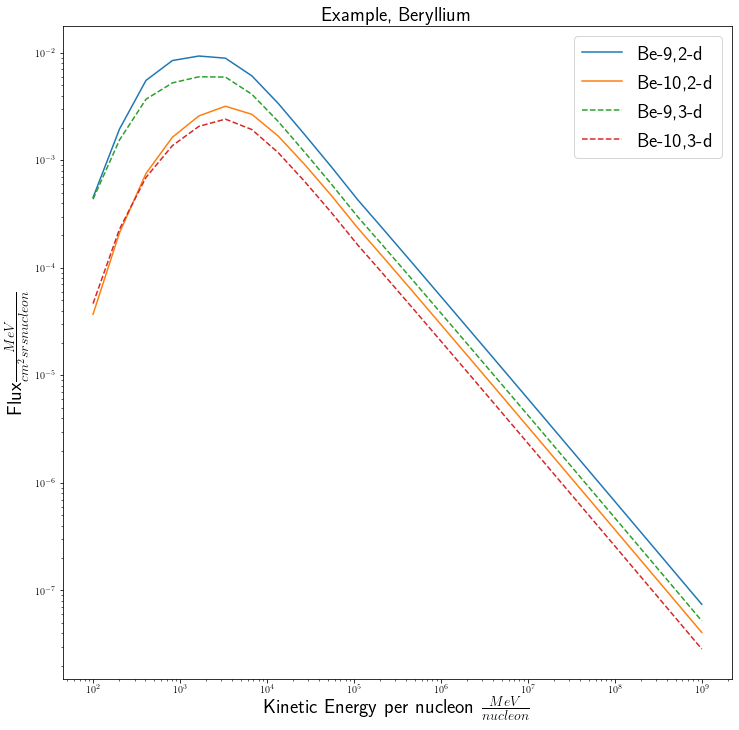

In [18]:
fnt=20
plt.figure(figsize=(12,12))
plt.plot(energy,image_data4[15,:,20,11],label='Be-9,2-d')
plt.plot(energy,image_data4[16,:,20,11],label='Be-10,2-d')
plt.plot(energy,image_data5[15,:,20,18,20],'--',label='Be-9,3-d')
plt.plot(energy,image_data5[16,:,20,18,20],'--',label='Be-10,3-d')
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon " r'$\frac{MeV}{nucleon}$' ,fontsize=fnt)
#r'$\frac{MeV}{nucleon}$'
plt.yscale("log")
plt.ylabel("Flux" r'$\frac{MeV}{cm^{2} sr s nucleon}$',fontsize=fnt)
#r'$\frac{MeV}{cm^{2} sr s nucleon}$'
plt.legend(loc='upper right',fontsize=fnt)
plt.title("Example, Beryllium", fontsize=fnt)
plt.show()

In [22]:
be_10_be_9=np.divide(image_data4[16,:,20,11],image_data4[15,:,20,11])
be_10_be_9_3=np.divide(image_data5[16,:,20,22,24],image_data5[15,:,20,22,24])

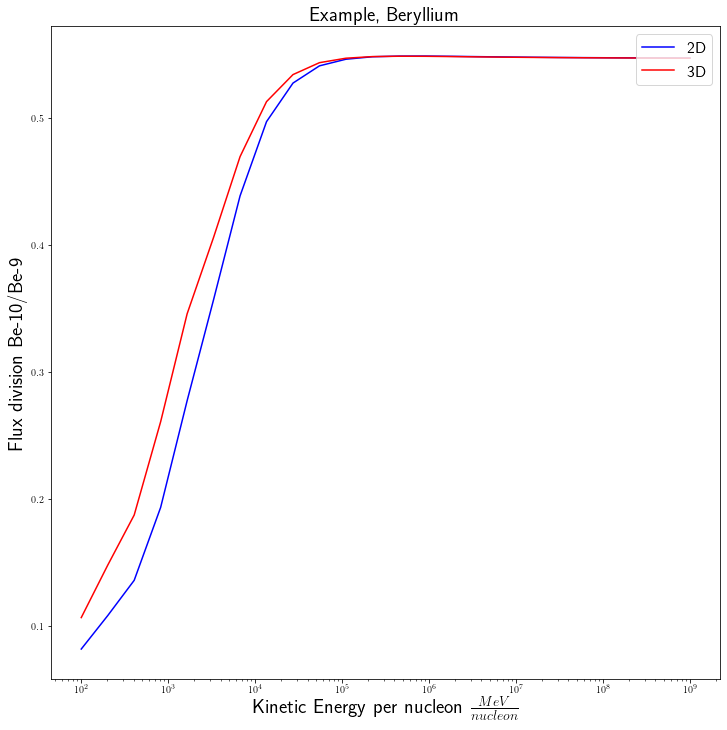

In [20]:
fnt=20
plt.figure(figsize=(12,12))
plt.plot(energy,be_10_be_9,color='blue',label="2D")
plt.plot(energy,be_10_be_9_3,color='Red',label="3D")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.legend(loc='upper right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.show()

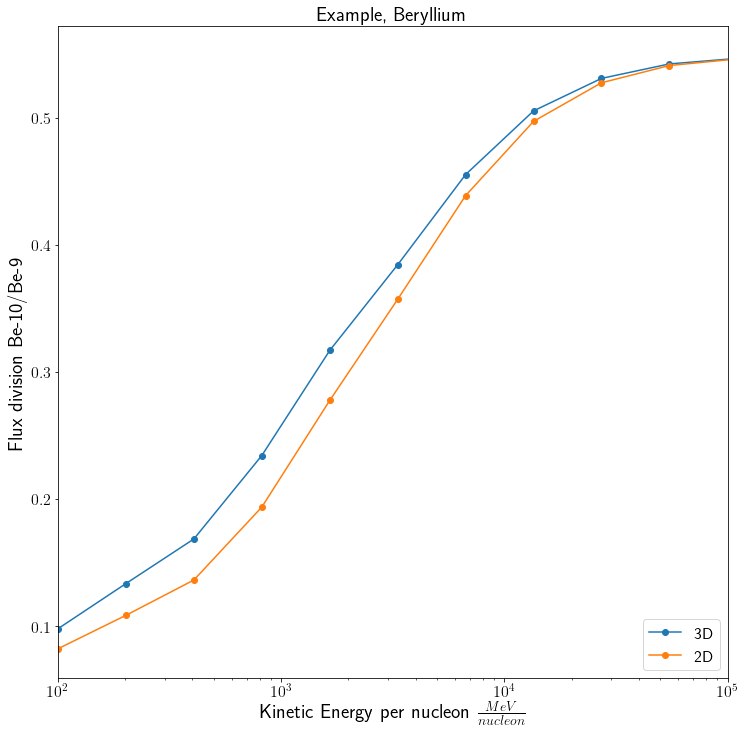

In [24]:
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
plt.plot(energy,be_10_be_9_3,'-o',label="3D")
plt.plot(energy,be_10_be_9,'-o',label="2D")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio.png")
plt.show()

In [46]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,2,20,:,:],image_data5[15,2,20,:,:])
print(norms.shape)
print(norms[:,10])

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
(21, 24)
[       nan 0.16802081 0.172658   0.17351246 0.18272407 0.18356313
 0.18644093 0.16387358 0.14167991 0.13413703 0.15945248 0.13413703
 0.14167991 0.16387358 0.18644093 0.18356313 0.18272407 0.17351246
 0.172658   0.16802081        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


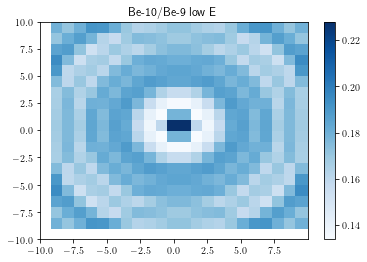

In [47]:
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 24)
[       nan 0.05283648 0.05350222 0.05460347 0.05614758 0.05814751
 0.06062175 0.06359448 0.06709567 0.07116137 0.07583382 0.08116169
 0.08720005 0.0940095  0.10165284 0.11018585 0.11963936 0.12999567
 0.14115869 0.15262003 0.15945248 0.15265098 0.14121117 0.13006248
 0.11971519 0.11026687 0.10173631 0.09409342 0.08728307 0.08124293
 0.07591274 0.07123772 0.06716939 0.06366564 0.06069055 0.05821421
 0.05621253 0.05466701 0.05356474 0.05289837        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


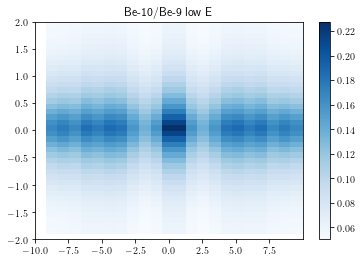

In [48]:
#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,2,:,10,:],image_data5[15,2,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept_xz.png")
plt.show()

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
(21, 24)
[       nan 0.54883325 0.5490398  0.54921764 0.5493623  0.54937375
 0.549289   0.54903626 0.5488393  0.5488174  0.5489294  0.5488174
 0.5488393  0.54903626 0.549289   0.54937375 0.5493623  0.54921764
 0.5490398  0.54883325        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


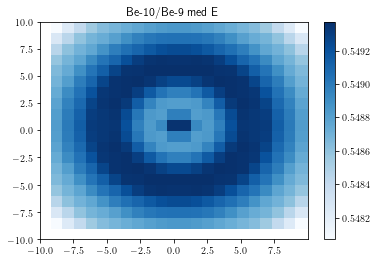

In [49]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,12,20,:,:],image_data5[15,12,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 24)
[       nan 0.5487133  0.54867995 0.5486811  0.54869044 0.5487032
 0.54871774 0.5487333  0.5487495  0.5487662  0.54878324 0.54880047
 0.5488177  0.548835   0.54885197 0.54886866 0.5488847  0.5488997
 0.54891336 0.54892445 0.5489294  0.5489245  0.54891336 0.54889977
 0.5488847  0.5488687  0.548852   0.548835   0.5488178  0.54880047
 0.5487833  0.54876626 0.54874957 0.54873323 0.54871774 0.5487032
 0.54869044 0.5486811  0.5486799  0.5487133         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


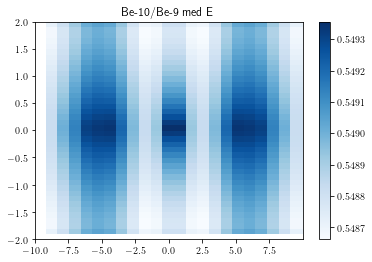

In [55]:
#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,12,:,10,:],image_data5[15,12,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med_xz.png")
plt.show()

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
(21, 24)
[       nan 0.5471941  0.5472132  0.54723305 0.5472456  0.5472473
 0.54723704 0.54721737 0.54720515 0.54720354 0.5472039  0.54720354
 0.54720515 0.54721737 0.54723704 0.5472473  0.5472456  0.54723305
 0.5472132  0.5471941         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


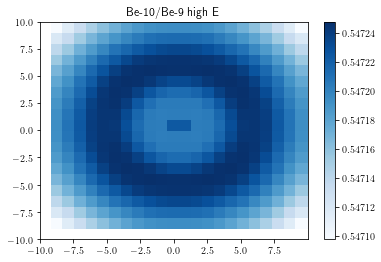

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 24)
[       nan 0.5480477  0.5475351  0.5473847  0.5473226  0.5472901
 0.5472699  0.5472564  0.54724705 0.5472405  0.5472357  0.54723215
 0.5472293  0.5472269  0.5472248  0.54722285 0.5472211  0.54721946
 0.5472176  0.5472122  0.5472039  0.5472121  0.54721755 0.5472194
 0.54722106 0.54722285 0.5472248  0.54722685 0.5472293  0.54723215
 0.5472357  0.54724044 0.547247   0.54725635 0.5472699  0.5472901
 0.5473225  0.54738456 0.547535   0.5480477         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


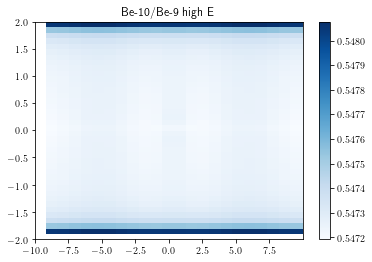

In [56]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,22,20,:,:],image_data5[15,22,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high.png")
plt.show()#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,22,:,10,:],image_data5[15,22,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high_xz.png")
plt.show()